# Basic tutorial for solving Regression Problems (Tabular data)
#### How to approach a regression problem? and What is the basic procedure to follow for a given dataset?
#### --> Identify the problem we are trying to solve based on the given dataset. It can be regression or classification.
#### --> Check the various fields in the provided dataset
#### --> Identify the important features and perform Exploratory data analysis (EDA)
#### --> Based on the previous step select a set of models(Build a custom Model if needed) that could solve the specified task.
#### --> Train and validate the model on a specified performance metric 
#### --> Based on the performance select the model

### Import dependancies based on the task to be performed

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#  Load data into pandas data frame 

In [4]:
df = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

## Exploring Data

In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## The below plot shows the difference for classification vs Regression target values

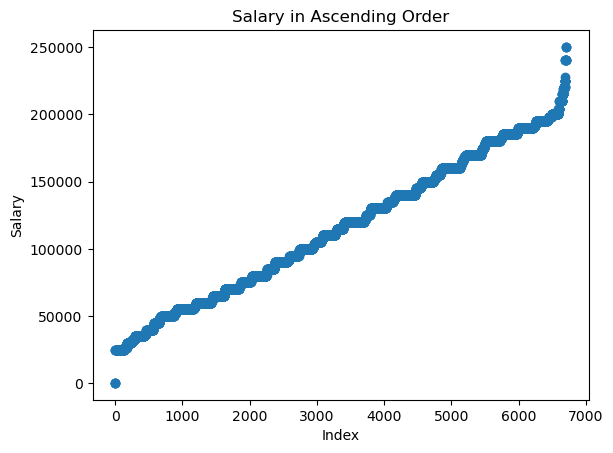

In [9]:
sorted_df = df.sort_values('Salary')

# Plot the values in ascending order
plt.scatter(df.index,sorted_df['Salary'], marker='o')

plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Salary in Ascending Order')
plt.show()

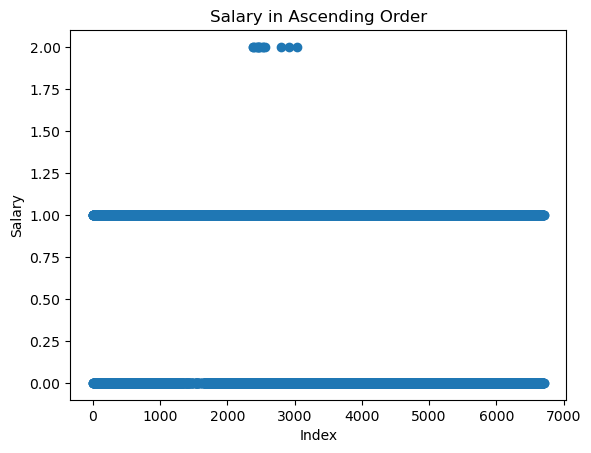

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dummy_df = df.copy()
dummy_df['Years of Experience_encoded']=encoder.fit_transform(df['Gender'])

plt.scatter(dummy_df.index,dummy_df['Years of Experience_encoded'], marker='o')

plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Salary in Ascending Order')
plt.show()

## Find the Number of Unique values in each attribute.
##### Since it is understood that these variables wont be holding contunious numeric values but descrete class wise values

In [10]:
print(len(df['Gender'].unique()))
print(len(df['Education Level'].unique()))
print(len(df['Job Title'].unique()))

3
7
191


In [11]:
print(df['Education Level'].unique())
print(df['Gender'].unique())
#print(df['Job Title'].unique())

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
['Male' 'Female' 'Other']


In [12]:
df['Education Level'] = df['Education Level'].replace({"Master's": 'masters',
                                                      "Master's Degree": 'masters',
                                                      "Bachelor's": 'bachelors',
                                                      "Bachelor's Degree": 'bachelors',
                                                      'PhD': 'phd',
                                                      'phD': 'phd',
                                                      'High School': 'high_school'})


In [13]:
print(df['Education Level'].unique())
print(df['Gender'].unique())
print(df['Job Title'].unique())

['bachelors' 'masters' 'phd' 'high_school']
['Male' 'Female' 'Other']
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 '

In [14]:
len(df[df['Gender'].isin(['Female']) & df['Job Title'].isin(['Software Engineer'])])

193

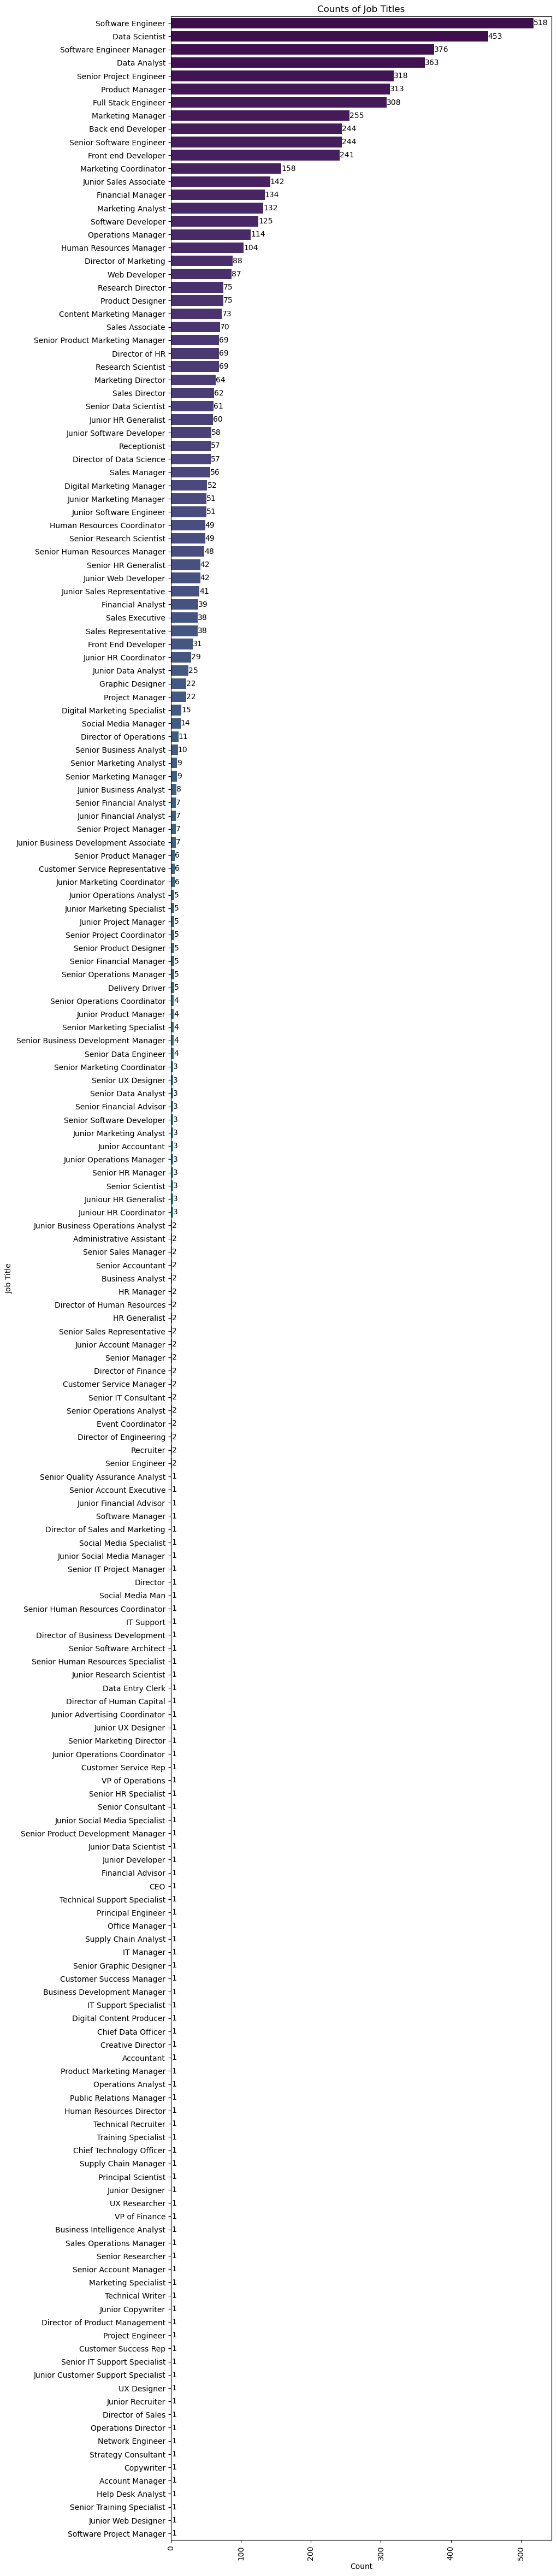

In [15]:


# Get the counts of each job title
job_title_counts = df['Job Title'].value_counts()

# Create the bar graph
plt.figure(figsize=(9, 60))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='viridis')

plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Counts of Job Titles')
plt.xticks(rotation=90)

# Add the numbers on top of each bar
for i, count in enumerate(job_title_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()


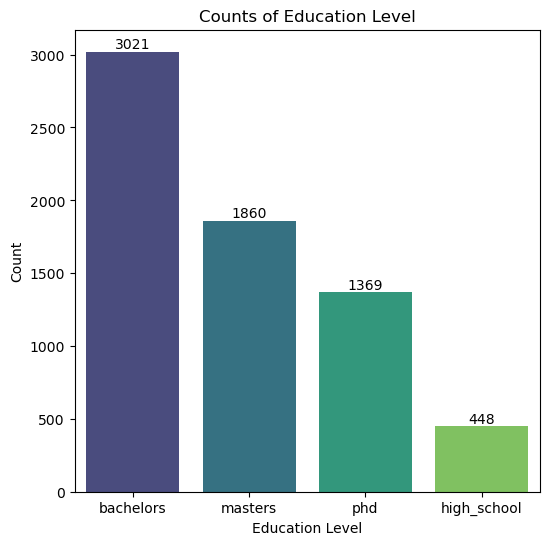

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each job title
job_title_counts = df['Education Level'].value_counts()

# Create the bar graph
plt.figure(figsize=(6, 6))
sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette='viridis')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Counts of Education Level')
plt.xticks(rotation=0)

# Add the numbers on top of each bar
for i, count in enumerate(job_title_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


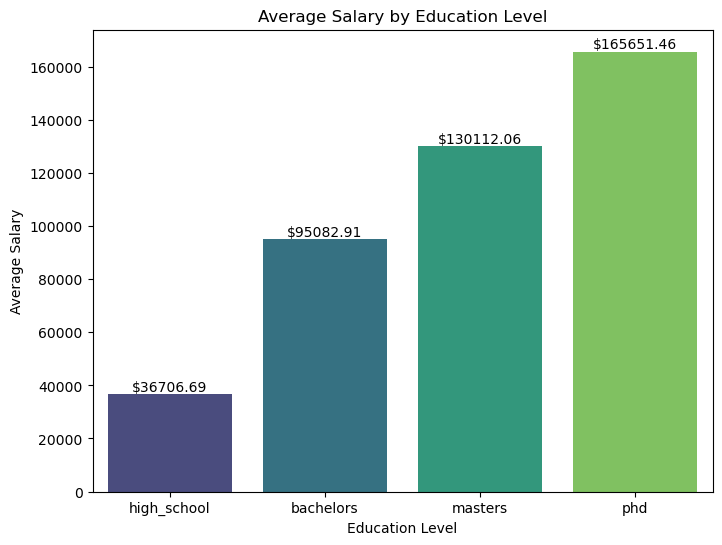

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by 'Education Level' and calculate the mean salary
average_salary = df.groupby('Education Level')['Salary'].mean()

# Sort the DataFrame by average salary in ascending order
average_salary_sorted = average_salary.sort_values()

# Create the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=average_salary_sorted.index, y=average_salary_sorted.values, palette='viridis')

plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=0)

# Add the average salary values on top of each bar
for i, salary in enumerate(average_salary_sorted.values):
    plt.text(i, salary, f"${salary:.2f}", ha='center', va='bottom')

plt.show()


In [18]:
threshold = 50  # Specify the threshold count

# Count the occurrences of each job title
job_title_counts = df['Job Title'].value_counts()

# Get the job titles that meet the threshold condition
selected_job_titles = job_title_counts[job_title_counts >= threshold].index

# Create the new dataframe by filtering rows based on selected job titles
new_df = df[df['Job Title'].isin(selected_job_titles)].copy()


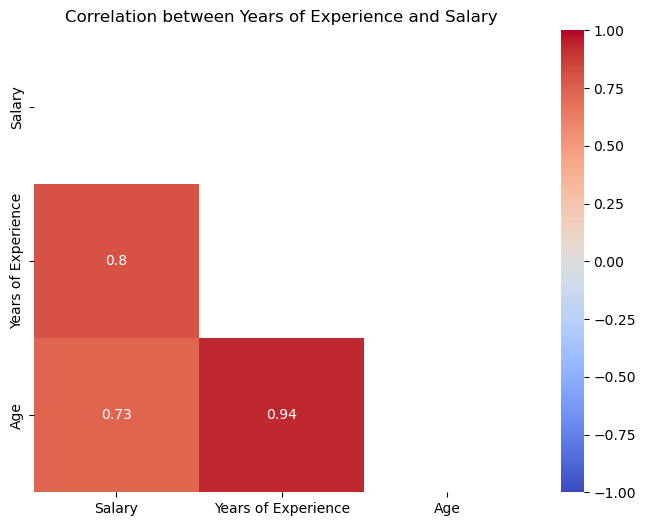

In [19]:


# Calculate the correlation matrix
correlation_matrix = new_df[['Salary','Years of Experience', 'Age']].corr()

# Create a mask to hide redundant values
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
vmin = -1.0  # Minimum value of the color scale
vmax = 1.0 
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=vmin, vmax=vmax)

plt.title('Correlation between Years of Experience and Salary')
plt.show()


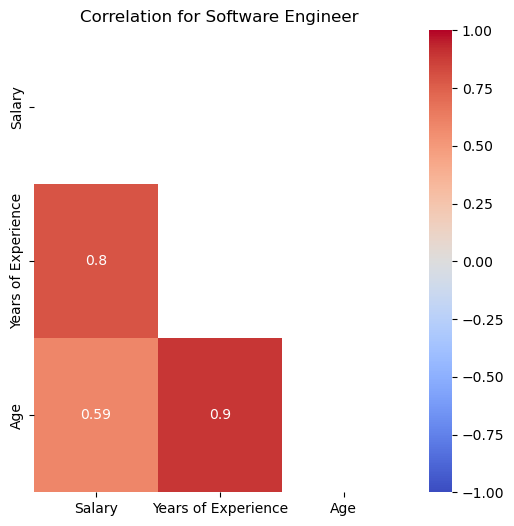

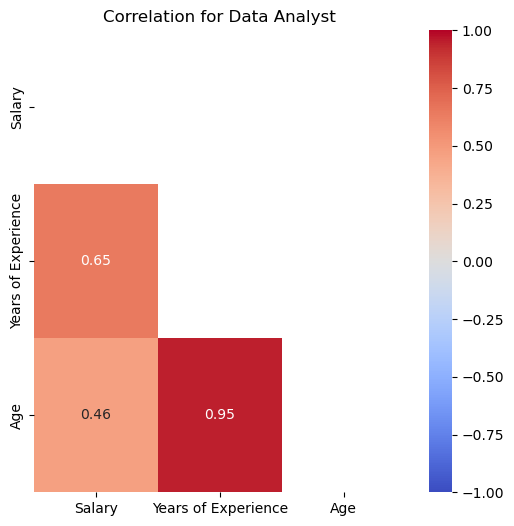

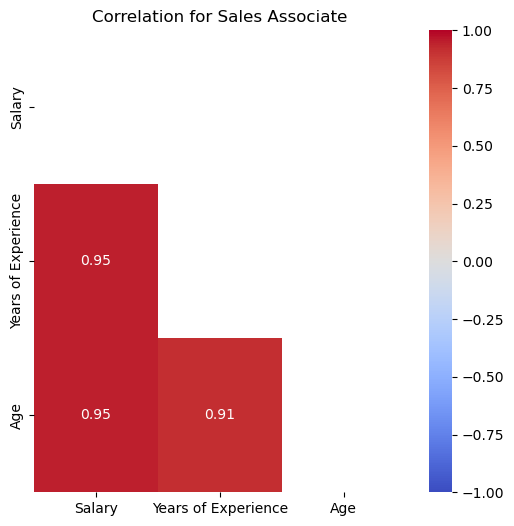

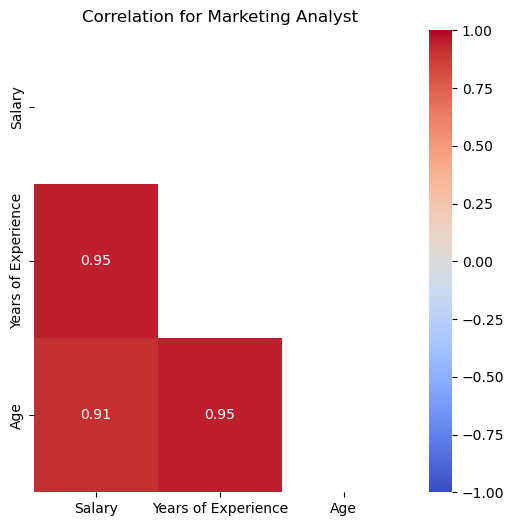

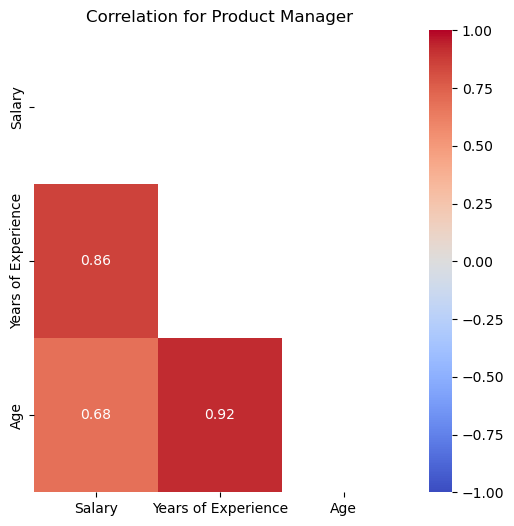

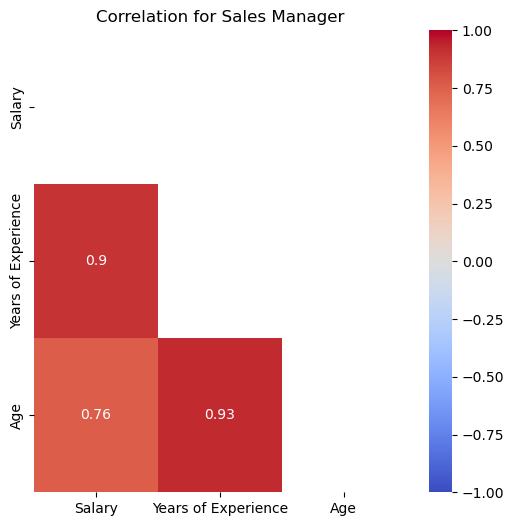

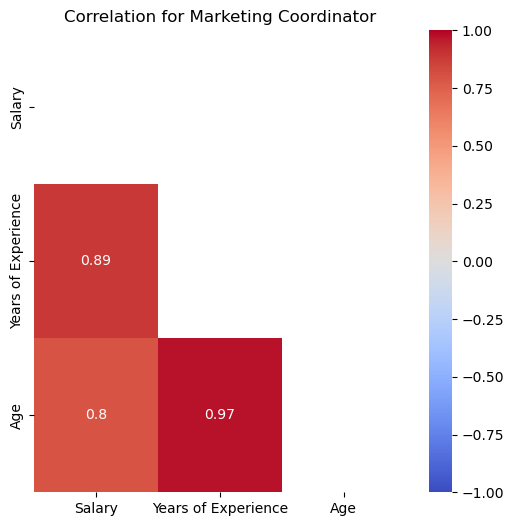

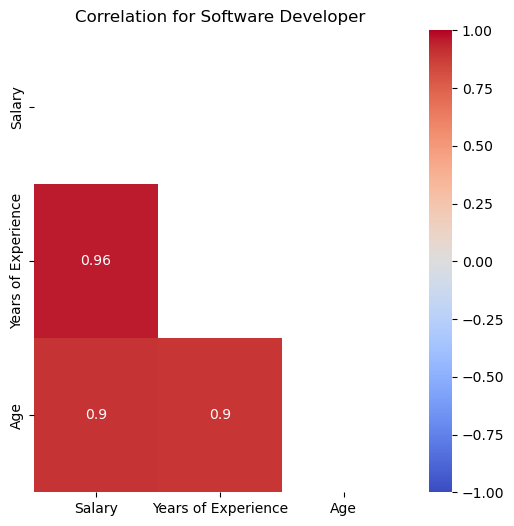

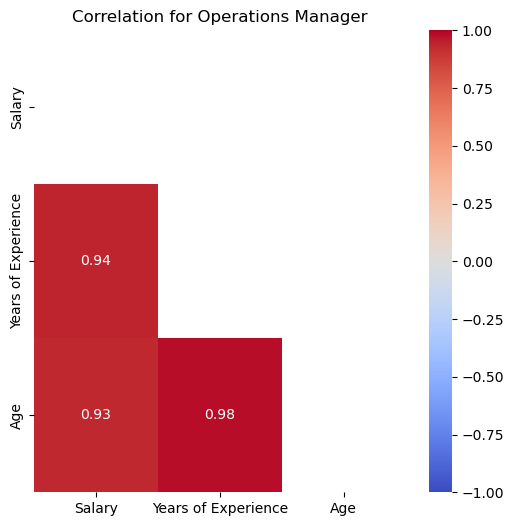

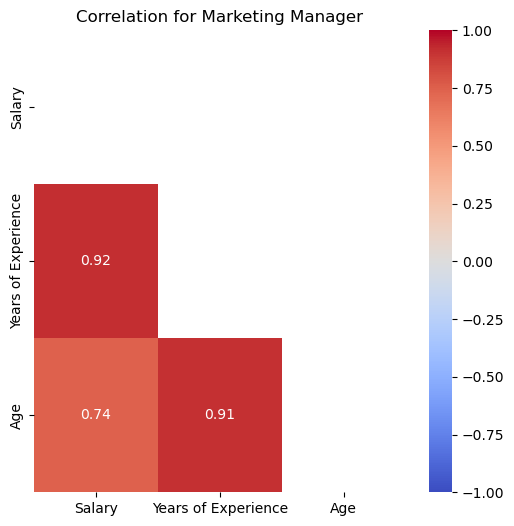

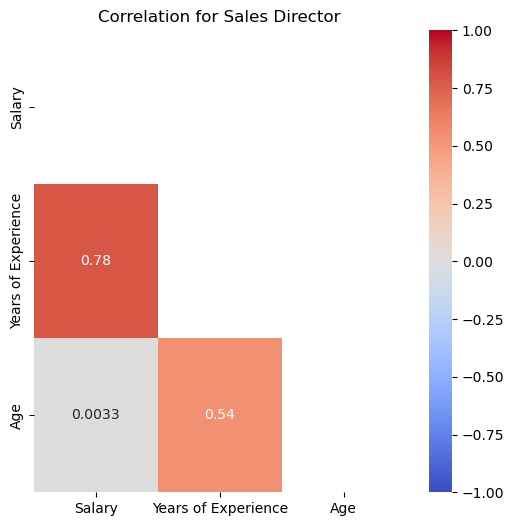

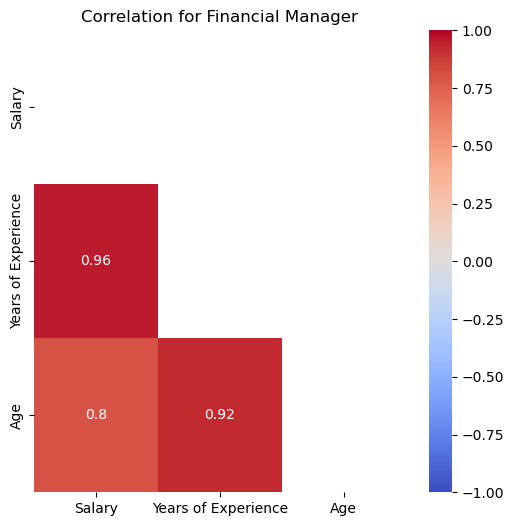

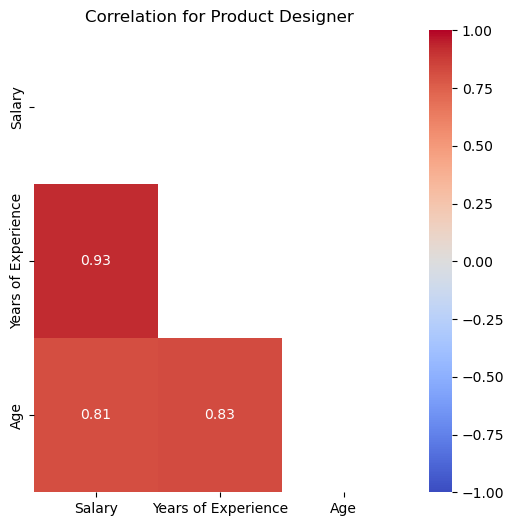

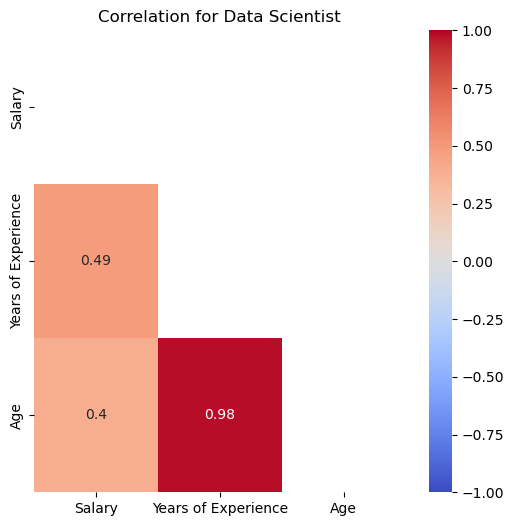

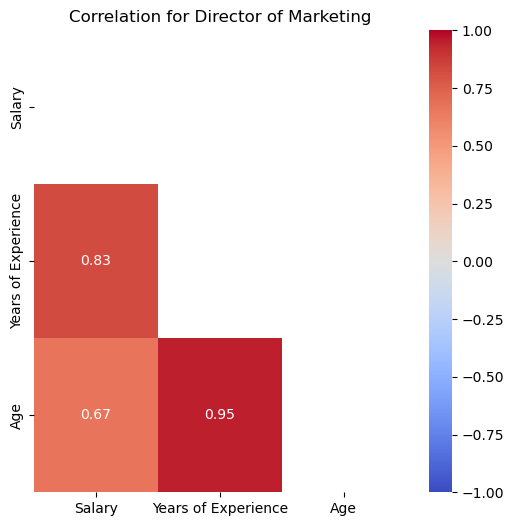

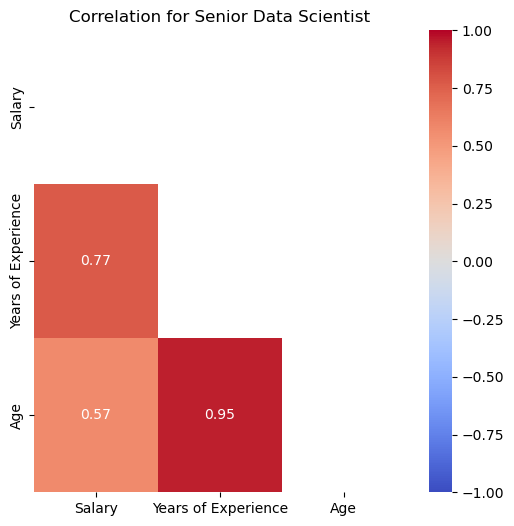

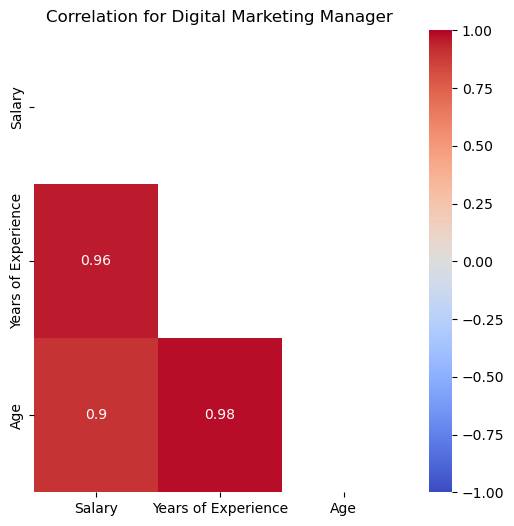

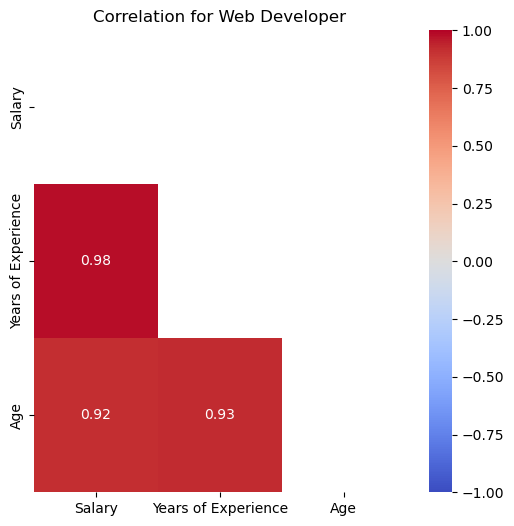

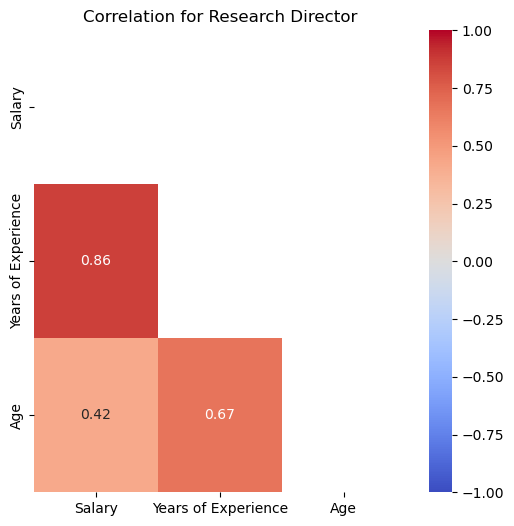

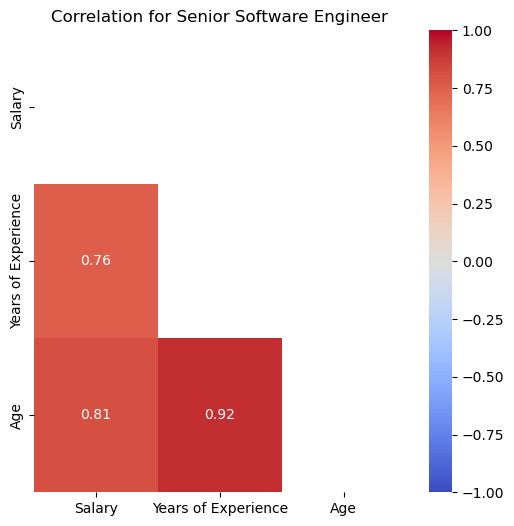

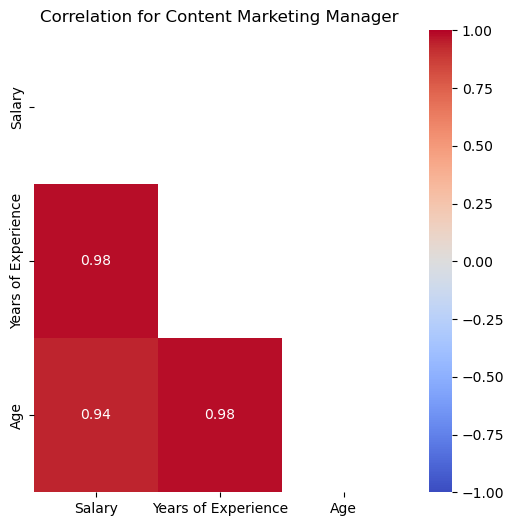

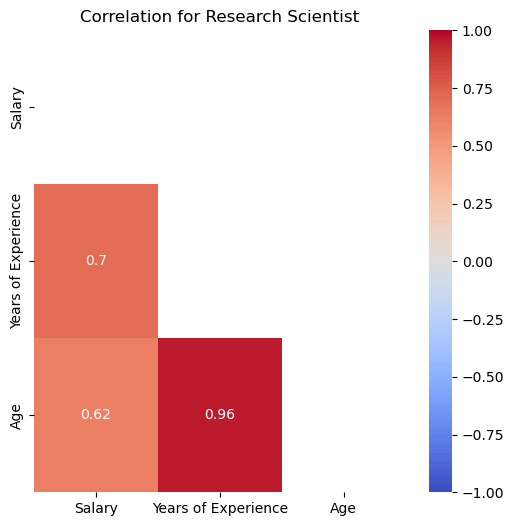

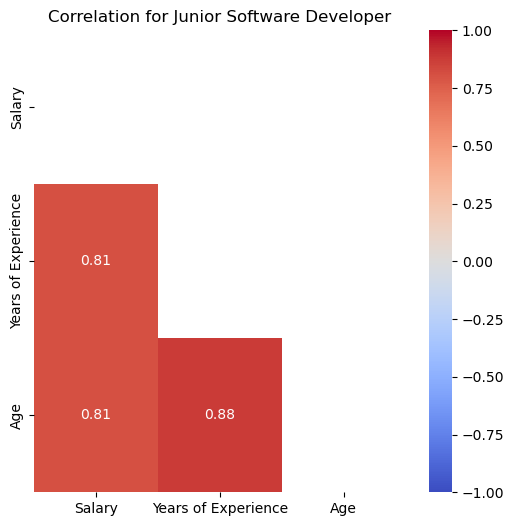

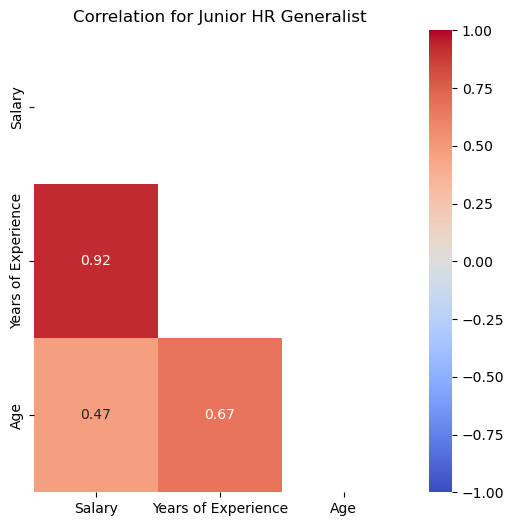

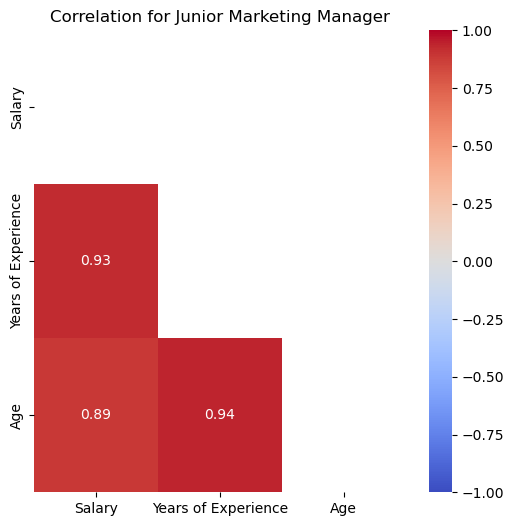

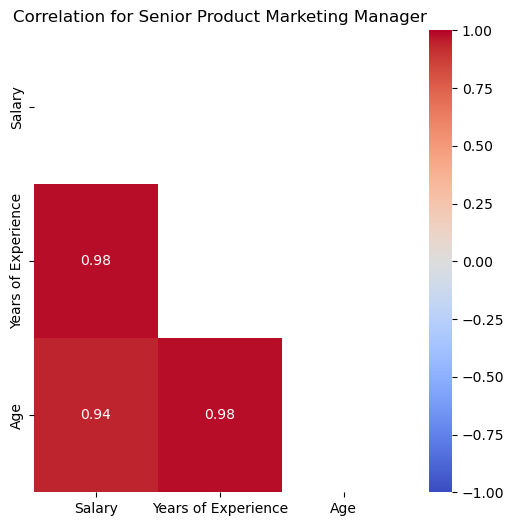

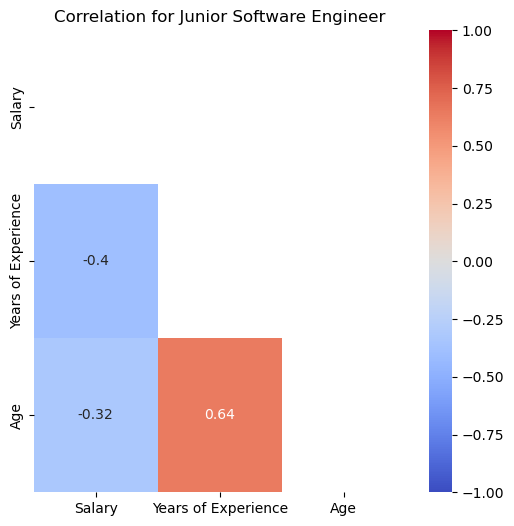

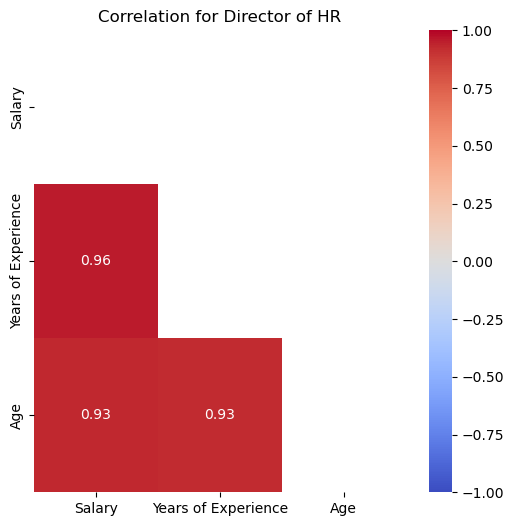

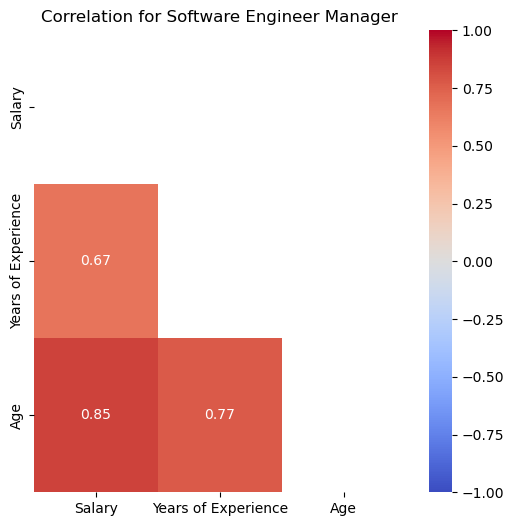

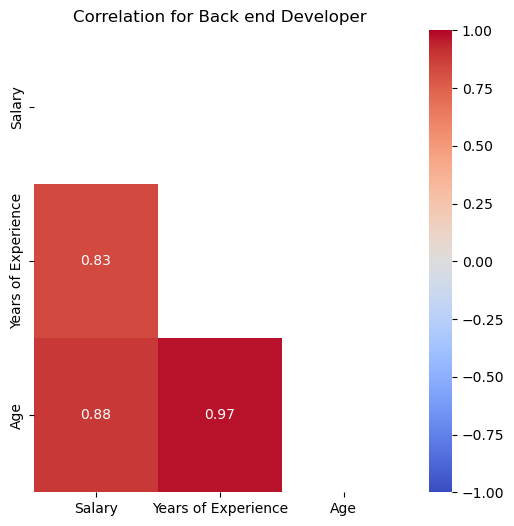

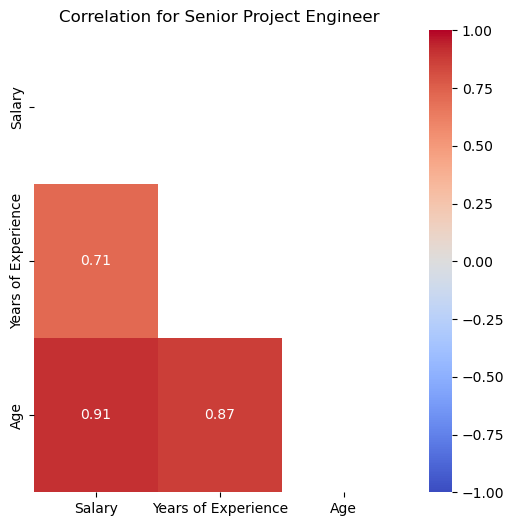

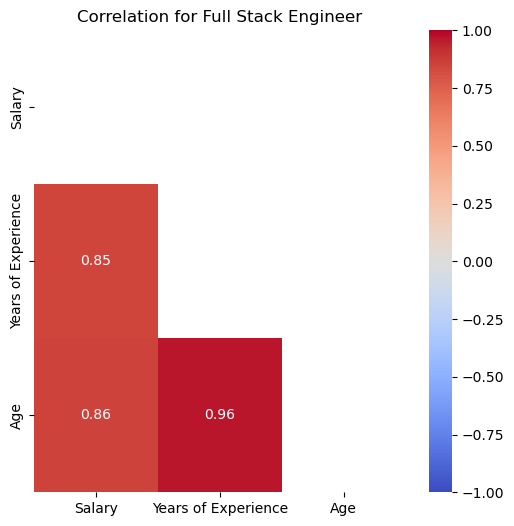

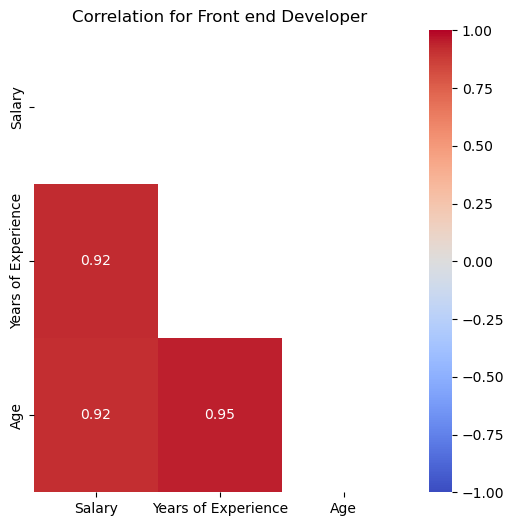

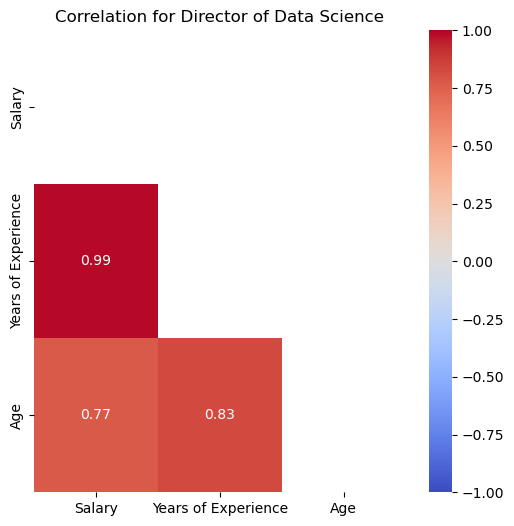

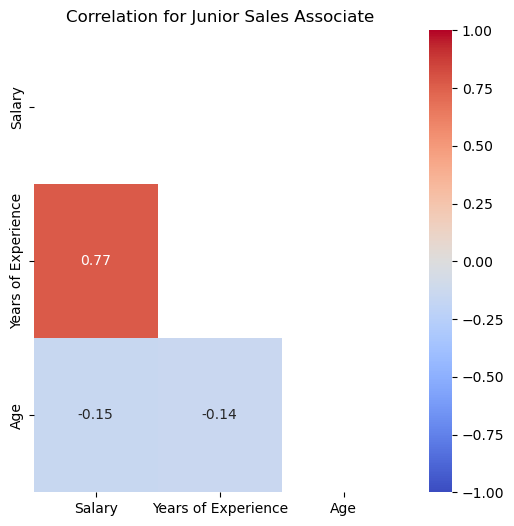

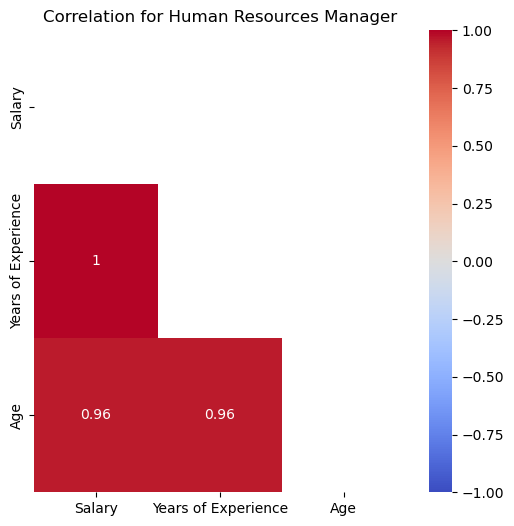

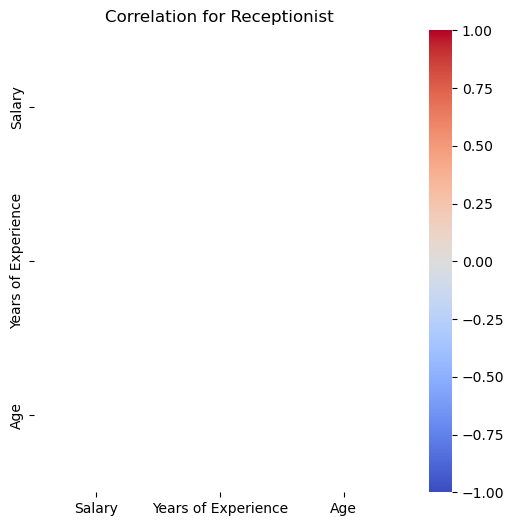

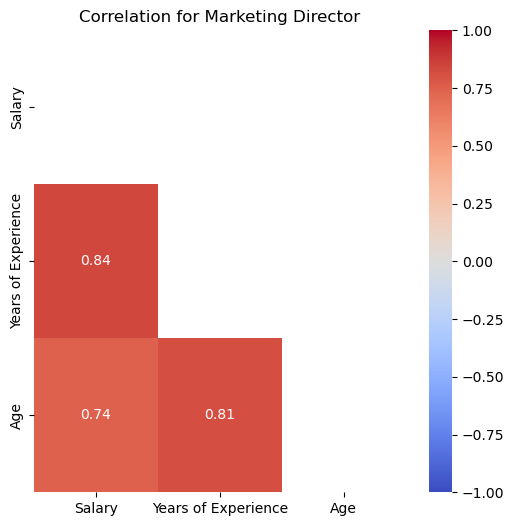

In [20]:

job_titles = new_df['Job Title'].unique()  # List of job titles

# Iterate through the list of job titles
for job_title in job_titles:
    # Filter the DataFrame for the current job title
    filtered_df = new_df[new_df['Job Title'] == job_title]

    # Calculate the correlation matrix for the current job title
    correlation_matrix = filtered_df[['Salary','Years of Experience', 'Age']].corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Set the range of the color scale to a constant value
    vmin = -1.0  # Minimum value of the color scale
    vmax = 1.0  # Maximum value of the color scale

    # Create the heatmap for the current job title
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=vmin, vmax=vmax)

    plt.title(f'Correlation for {job_title}')
    plt.show()


In [21]:
new_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,bachelors,Software Engineer,5.0,90000.0
1,28.0,Female,masters,Data Analyst,3.0,65000.0
3,36.0,Female,bachelors,Sales Associate,7.0,60000.0
5,29.0,Male,bachelors,Marketing Analyst,2.0,55000.0
6,42.0,Female,masters,Product Manager,12.0,120000.0
...,...,...,...,...,...,...
6697,51.0,Female,masters,Senior Product Marketing Manager,19.0,190000.0
6699,49.0,Female,phd,Director of Marketing,20.0,200000.0
6700,32.0,Male,high_school,Sales Associate,3.0,50000.0
6701,30.0,Female,bachelors,Financial Manager,4.0,55000.0


# Pre processing for Tree Based Models

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

new_df['Gender']=encoder.fit_transform(new_df['Gender'])

#### Perform One hot encoding for various classes of Job Title

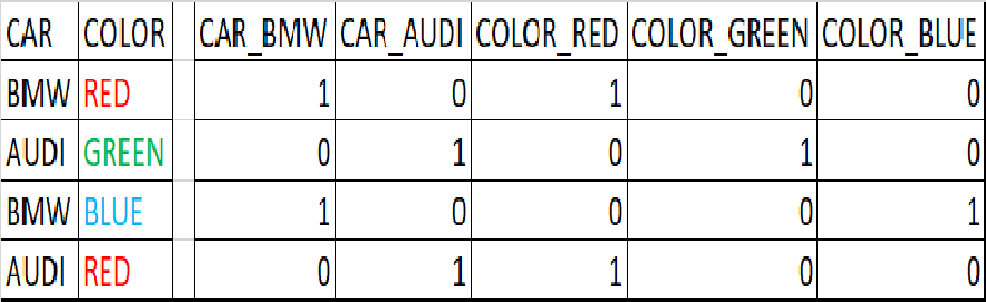

In [23]:
new_df = pd.get_dummies(data = new_df, drop_first=True)
new_df.head()

,Age,Gender,Years of Experience,Salary,Education Level_high_school,Education Level_masters,Education Level_phd,Job Title_Content Marketing Manager,Job Title_Data Analyst,Job Title_Data Scientist,...,Job Title_Sales Director,Job Title_Sales Manager,Job Title_Senior Data Scientist,Job Title_Senior Product Marketing Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Web Developer
0,32.0,1,5.0,90000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28.0,0,3.0,65000.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,0,7.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29.0,1,2.0,55000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42.0,0,12.0,120000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training 

In [22]:
x = new_df.drop(['Salary'],1)
y = new_df['Salary']

/tmp/ipykernel_31/2272794470.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = new_df.drop(['Salary'],1)


### Decision Tree, Random Forrest and linear regression

In [23]:
# Dependancies 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

Decesion Tree Model Score: 0.9740851845168039
The deapth of the tree is : 25


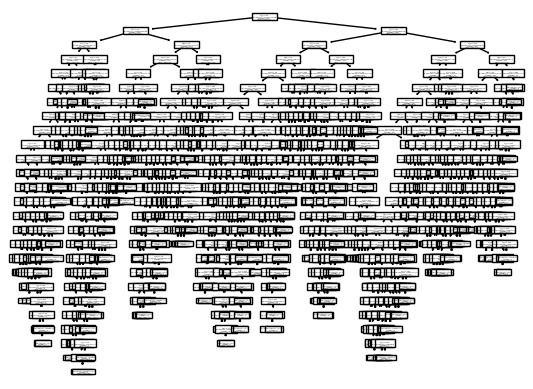

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor()

model.fit(x_train, y_train)
depth = model.get_depth()
score_decesion_tree = model.score(x_test, y_test)
print("Decesion Tree Model Score:", score_decesion_tree)
print(f"The deapth of the tree is : {depth}")
plot_tree(model)
plt.show()

Random Forest Score: 0.9795407426539099
Number of trees in the Random Forest: 100
Depth of Tree 1: 22


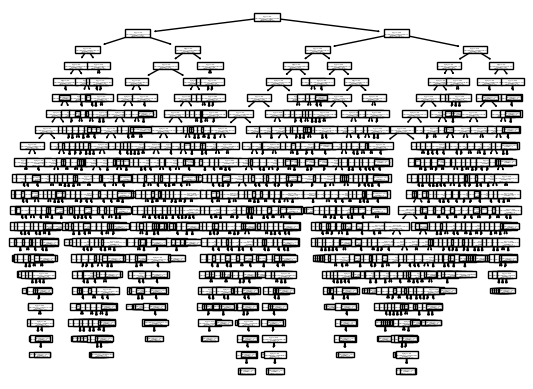

Depth of Tree 2: 25


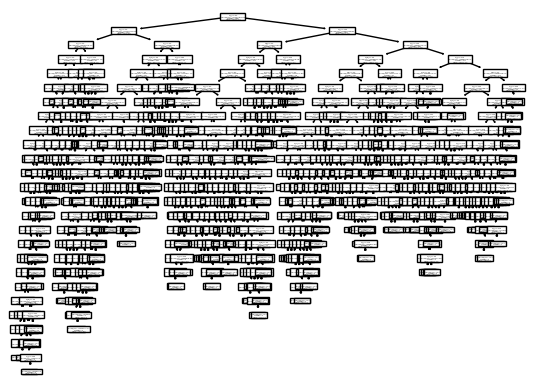

Depth of Tree 3: 23


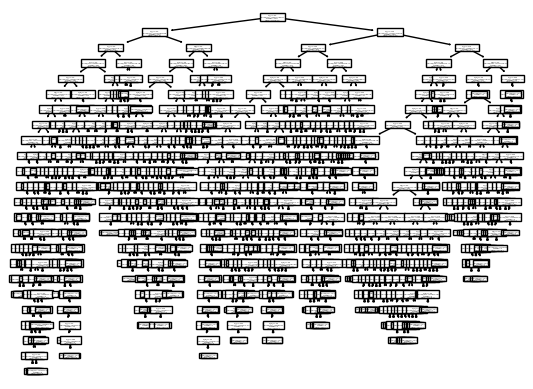

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(x_train, y_train)

score_random_forest = model.score(x_test, y_test)
print("Random Forest Score:", score_random_forest)

num_trees = model.n_estimators
print("Number of trees in the Random Forest:", num_trees)

# Iterate over each tree estimator
for i in range(3):
    tree = model.estimators_[i]
    depth = tree.get_depth()
    print(f"Depth of Tree {i+1}: {depth}")

    # Plot the tree
    plot_tree(tree)
    plt.show()


In [26]:


# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

# Evaluate the model on the test data
score_LinearRegression = model.score(x_test, y_test)
print("LinearRegression Score:", score_LinearRegression)


LinearRegression Score: 0.8120199211391576


In [27]:
score_decesion_tree,score_random_forest,score_LinearRegression

(0.9740851845168039, 0.9795407426539099, 0.8120199211391576)

### Decision Tree, Random Forrest and linear regression with K-Fold CV

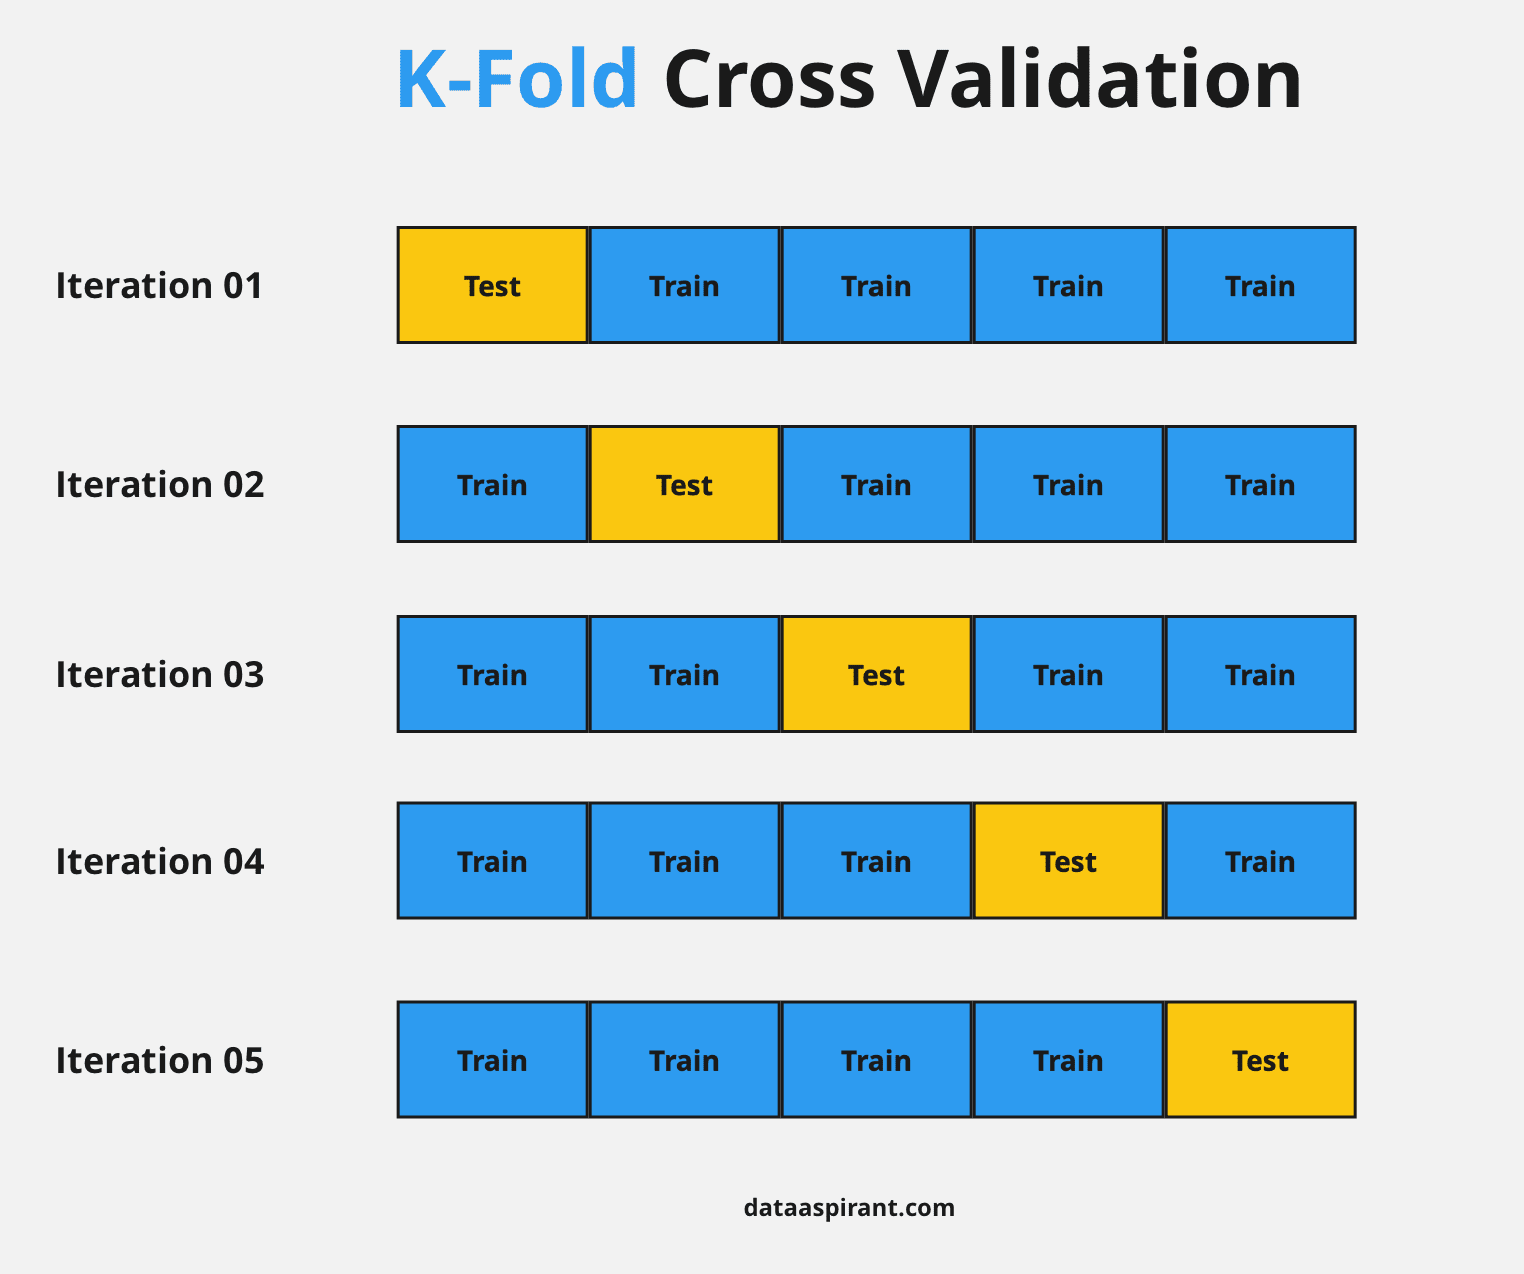

In [28]:

model = DecisionTreeRegressor()

# Perform k-fold cross-validation
scores_cv_DT = cross_val_score(model, x, y, cv=10)  

# Print the scores for each fold
print("Cross-validated scores:", scores_cv_DT)

# Compute the mean score
scores_cv_DT_mean = scores_cv_DT.mean()
print("Mean cross validation score of DecisionTreeRegressor :", scores_cv_DT_mean)


Cross-validated scores: [0.57407448 0.72647388 0.95756364 0.8900238  0.951619   0.90496253
 0.8658739  0.77068139 0.90134107 0.73845155]
Mean cross validation score of DecisionTreeRegressor : 0.8281065256699798


In [29]:

model = RandomForestRegressor()

# Perform k-fold cross-validation
scores_cv_RF = cross_val_score(model, x, y, cv=10)  
# Print the scores for each fold
print("Cross-validated scores:", scores_cv_RF)

# Compute the mean score
mean_scores_cv_RF = scores_cv_RF.mean()
print("Mean cross validation score of RandomForestRegressor :", mean_scores_cv_RF)


Cross-validated scores: [0.55360169 0.78595287 0.96646476 0.91631905 0.95898469 0.94308662
 0.8835012  0.86145463 0.91183524 0.81162054]
Mean cross validation score of RandomForestRegressor : 0.8592821278091352


In [30]:

model = LinearRegression()

# Perform k-fold cross-validation
scores_cv_LinearRegression = cross_val_score(model, x, y, cv=10)  
# Print the scores for each fold
print("Cross-validated scores:", scores_cv_LinearRegression)

# Compute the mean score
mean_scores_cv_LinearRegression = scores_cv_LinearRegression.mean()
print("Mean cross validation score of LinearRegression :", mean_scores_cv_LinearRegression)


Cross-validated scores: [-0.39630634  0.438997    0.7888432   0.60262471  0.56383032  0.74108227
  0.87651385  0.74019477  0.80443227  0.68041607]
Mean cross validation score of LinearRegression : 0.584062813245023


## Comparison for all the models

In [31]:
# Create a dictionary with the data
data = {
    'Model Name': ['Decision Tree', 'Random Forest', 'Linear Regression'],
    'Without K-fold Score': [score_decesion_tree, score_random_forest, score_LinearRegression],
    'K-fold Score': [scores_cv_DT_mean, mean_scores_cv_RF, mean_scores_cv_LinearRegression]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

,Model Name,Without K-fold Score,K-fold Score
0,Decision Tree,0.974085,0.828107
1,Random Forest,0.979541,0.859282
2,Linear Regression,0.812020,0.584063


### From the above table we can compare the performance of 3 tested models 

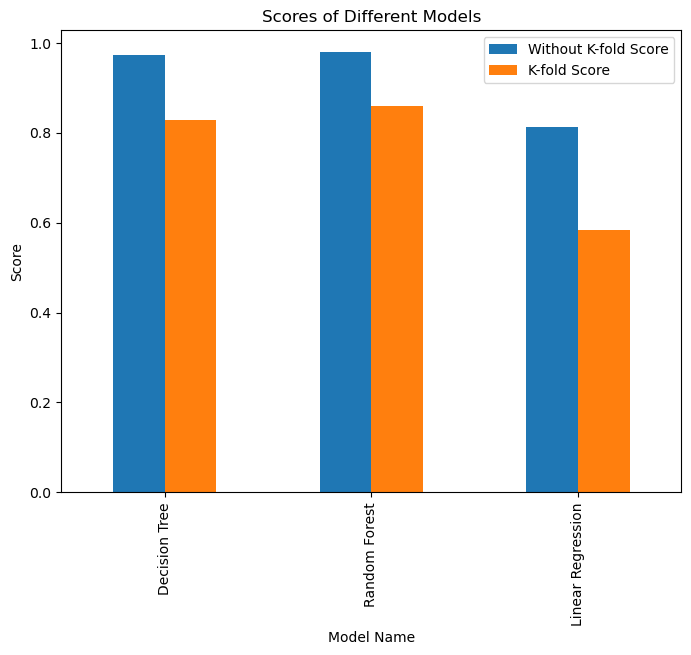

In [32]:
data = {
    'Model Name': ['Decision Tree', 'Random Forest', 'Linear Regression'],
    'Without K-fold Score': [score_decesion_tree, score_random_forest, score_LinearRegression],
    'K-fold Score': [scores_cv_DT_mean, mean_scores_cv_RF, mean_scores_cv_LinearRegression]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Model Name' column as the index
df.set_index('Model Name', inplace=True)

# Plot the bar graph
df.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Scores of Different Models')

# Display the plot
plt.show()